# **Support Vector Machine (SVM) Classification**

Linear ve linear olmayan classification, regression ve outlier detection problemlerinde kullanılır.

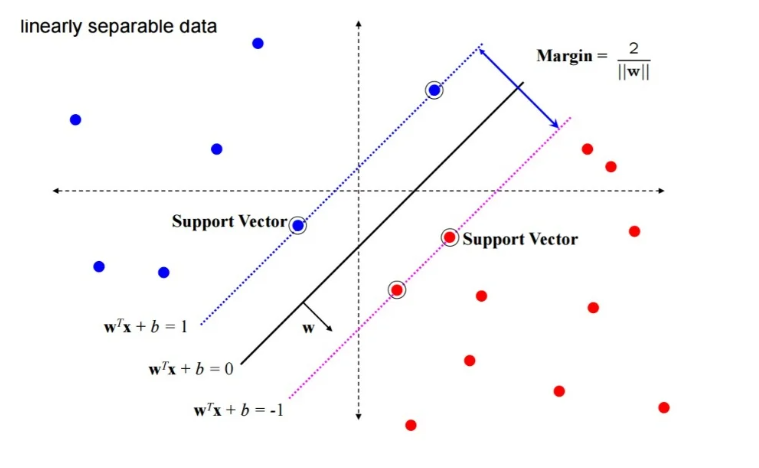

İki classı ayıran çizgiye **decision boundary** denir.

Decision boundary'e en yakın noktalara **support vectors** denir.

SVM algoritmasıyla iki classın support vectorlerine olabilecek en uzak noktadan decision boundary çizilir.

İki class arasında kalan bölgeye **margin** denir.

Dataframe'deki veriler birbirine çok yakın değerlerde olabilir. Veriler scale edilerek (**feature scaling**) decision boundary'nin net bir şekilde gözükmesi sağlanır.

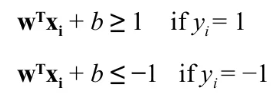

**weight** -> ağırlık vektörü

**x** -> veri noktası 

**b** -> bias 

 **y** -> veri noktasının sınıfı (1 veya -1)

 Yeni veri geldiğinde çıkan sonuç 1'den büyükse mavi renkli sınıfa, -1'den küçükse kırmızı renkli sınıfa ait olur. 

 -1 ve 1 noktaları support vector noktalarıdır.

Tüm veriler margin bölgesinin dışındaysa buna **hard margin classification** denir.

Bazı verilerin margin bölgesinde bulunması durumuna **soft margin classification** denir.

**C** değeri hyperparameter'dir. Bu hyperparameter kullanılarak margin genişliği ayarlanabilir. C değeri büyüdükçe margin daralır. 

Model overfit olursa C değerinin azaltılır, underfit olursa yükseltilir.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data kanserin iyi huylu mu, kötü huylu mu olduğunu gösterir.

Diagnosis sütununda bulunan 'M' harfi malignant kötü huylu demektir.

'B' harfi benign iyi huylu tümör demektir.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Datada 569 sample bulunmaktadır.

33 sütun bulunmakta, bu sütunların 31 tanesi float değer, 1 tanesi integer değer, 1 tanesi de string değer bulundurmaktadır.

'Unnamed: 32' sütunundaki değerlerin hepsinin missing value olduğu görülür.

Model oluşturulurken 'id' ve 'Unnamed: 32' sütunları sınıflandırmada bir etkisi olmayacağından kullanılmayacaktır.

In [5]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
#axis=1 olduğunda sütun drop edilir.
#inplace=True olduğunda yapılan değişiklik dataya kaydedilir.

İyi huylu ve kötü huylu tümörün görselleştirilmesi için birbirinden ayrılması gerekir.

In [6]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

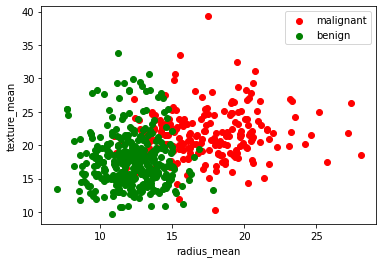

In [7]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

texture_mean ve radius_mean kullanılarak classify yapılacaktır.

In [8]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunundaki veriler string olduğundan sınıflandırma yapılırken karşılaştırma yapılamaz.
#bu yüzden kötü huylu tümör '1'e , iyi huylu tümör '0'a dönüştürülür.

y = data.diagnosis.values #pandas series values methodu ile numpy array'e çevrilir.
x_data = data.drop(["diagnosis"],axis=1) #diagnosis dışındakiler featurelardır.

In [9]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [10]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#random_state parametresiyle data train ve test olarak bölünürken kod her çalıştırıldığında aynı randomlıkta bölünür.
#bu parametre kullanılmazsa data her seferinde farklı yerlerden train ve test olarak ayrılacaktır.

In [11]:
#model fit
from sklearn.svm import SVC
svc = SVC(random_state = 42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [12]:
print("print accuracy of svm algo: {}".format(svc.score(x_test,y_test)))

print accuracy of svm algo: 0.9649122807017544


C değeri hyperparameter olduğundan en uygun değerin deneyerek bulunması gerekir.

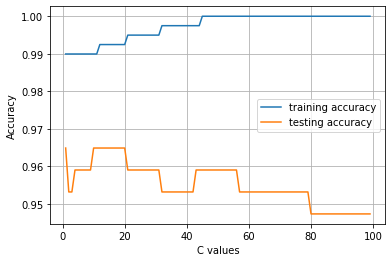

Best accuracy is 0.9649122807017544 when C = 1


In [18]:
train_accuracy = []
test_accuracy  = []
for i in range(1,100):
  svm = SVC(C=i)
  svm.fit(x_train,y_train)
  train_accuracy.append(svm.score(x_train,y_train))
  test_accuracy.append(svm.score(x_test,y_test))

plt.plot(range(1,100),train_accuracy, label= "training accuracy")
plt.plot(range(1,100),test_accuracy, label = "testing accuracy")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print("Best accuracy is {} when C = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Bu dataya göre en yüksek accuracy C=1 olduğunda alınır.